DQN - CartPole
=============

* 출처
    + OpenAI gym - CartPole github
        - https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py
    + Cartpole DQN github
        - https://github.com/rlcode/reinforcement-learning-kr-v2/blob/master/2-cartpole/1-dqn/train.py
    + 모두를 위한 머신러닝과 딥러닝의 강의 - Deep Reinforcement Learning
        - http://hunkim.github.io/ml/ 
    + Playing Atari with Deep Reinforcement Learning
        - https://arxiv.org/pdf/1312.5602.pdf
        - https://jonghyunho.github.io/reinforcement/learning/cartpole-reinforcement-learning.html

episode:   0 | score avg 67.00 | memory length:   67 | epsilon: 1.0000
episode:   1 | score avg 61.70 | memory length:   81 | epsilon: 1.0000
episode:   2 | score avg 59.33 | memory length:  119 | epsilon: 1.0000
episode:   3 | score avg 54.50 | memory length:  130 | epsilon: 1.0000
episode:   4 | score avg 52.25 | memory length:  162 | epsilon: 1.0000
episode:   5 | score avg 48.02 | memory length:  172 | epsilon: 1.0000
episode:   6 | score avg 45.72 | memory length:  197 | epsilon: 1.0000
episode:   7 | score avg 43.15 | memory length:  217 | epsilon: 1.0000
episode:   8 | score avg 40.83 | memory length:  237 | epsilon: 1.0000
episode:   9 | score avg 37.95 | memory length:  249 | epsilon: 1.0000
episode:  10 | score avg 38.36 | memory length:  291 | epsilon: 1.0000
episode:  11 | score avg 36.02 | memory length:  306 | epsilon: 1.0000
episode:  12 | score avg 36.02 | memory length:  342 | epsilon: 1.0000
episode:  13 | score avg 33.52 | memory length:  353 | epsilon: 1.0000
episod

episode: 115 | score avg 178.37 | memory length: 2000 | epsilon: 0.0100
episode: 116 | score avg 178.33 | memory length: 2000 | epsilon: 0.0100
episode: 117 | score avg 176.70 | memory length: 2000 | epsilon: 0.0100
episode: 118 | score avg 187.73 | memory length: 2000 | epsilon: 0.0100
episode: 119 | score avg 184.26 | memory length: 2000 | epsilon: 0.0100
episode: 120 | score avg 179.53 | memory length: 2000 | epsilon: 0.0100
episode: 121 | score avg 197.68 | memory length: 2000 | epsilon: 0.0100
episode: 122 | score avg 227.31 | memory length: 2000 | epsilon: 0.0100
episode: 123 | score avg 220.78 | memory length: 2000 | epsilon: 0.0100
episode: 124 | score avg 213.00 | memory length: 2000 | epsilon: 0.0100
episode: 125 | score avg 241.70 | memory length: 2000 | epsilon: 0.0100
episode: 126 | score avg 226.43 | memory length: 2000 | epsilon: 0.0100
episode: 127 | score avg 212.69 | memory length: 2000 | epsilon: 0.0100
episode: 128 | score avg 199.72 | memory length: 2000 | epsilon:

SystemExit: 

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


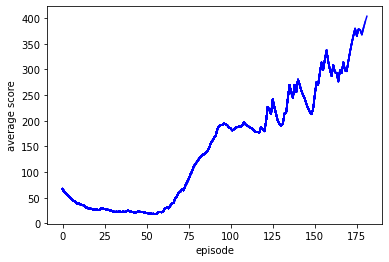

In [1]:
# 필요한 module import
import gym
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import Adam

# State가 입력, Q 함수가 출력인 Neural Network 생성
class DQN(tf.keras.Model):
    def __init__(self, action_size):
        super(DQN, self).__init__()
        self.fc1 = Dense(24, activation='relu')
        self.fc2 = Dense(24, activation='relu')
        self.fc_out = Dense(action_size, kernel_initializer=RandomUniform(-1e-3, 1e-3))

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        q = self.fc_out(x)
        return q

# CartPole 환경에서 agent 역할을 하는 DQNAgent class
# CartPole 환경에서는 4가지의 State와 2가지의 Action으로 이루어짐
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        # DQN 알고리즘을 구동하기 위한 hyper-parameter 값을 설정
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000
        # 리플레이 memory는 최대 크기 2000 으로 설정
        self.memory = deque(maxlen = 2000)
        # model 과 target_model 두 개의 Neural Network 생성
        self.model = DQN(action_size)
        self.target_model = DQN(action_size)
        self.optimizer = Adam(lr=self.learning_rate)

        self.update_target_model()
    
    # target_model의 weight를 model의 weight로 update 하는 함수
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
    
    # state, action, reward, next state S', 완료 여부 done 을 저장
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    # epsilon을 이용하여 Exploration과 Exploitation의 비율을 조정
    # E-greedy 사용
    def choose_action(self, state):
        return random.randrange(self.action_size) if (np.random.rand() <= self.epsilon) else np.argmax(self.model.predict(state))
    
    # 경사 하강법(gradient descent)으로 learning을 진행
    def train_model(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        mini_batch = random.sample(self.memory, self.batch_size)
        
        # print를 위해 정의
        states = np.array([sample[0][0] for sample in mini_batch])
        actions = np.array([sample[1] for sample in mini_batch])
        rewards = np.array([sample[2] for sample in mini_batch])
        next_states = np.array([sample[3][0] for sample in mini_batch])
        dones = np.array([sample[4] for sample in mini_batch])

        model_params = self.model.trainable_variables
        with tf.GradientTape() as tape:
            predicts = self.model(states)
            one_hot_action = tf.one_hot(actions, self.action_size)
            predicts = tf.reduce_sum(one_hot_action * predicts, axis=1)

            target_predicts = self.target_model(next_states)
            target_predicts = tf.stop_gradient(target_predicts)

            max_q = np.amax(target_predicts, axis=-1)
            targets = rewards + (1 - dones) * self.discount_factor * max_q
            loss = tf.reduce_mean(tf.square(targets - predicts))

        grads = tape.gradient(loss, model_params)
        self.optimizer.apply_gradients(zip(grads, model_params))

# CartPole-v1과 학습을 진행할 DQNAgent를 생성
if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = DQNAgent(state_size, action_size)

    scores, episodes = [], []
    score_avg = 0
    num_episode = 300
    # episode 가 시작될 때마다 환경을 초기화
    for e in range(num_episode):
        done = False
        score = 0

        state = env.reset()
        state = state.reshape(1, -1)
        
        while not done:
            env.render()
            
            # 현재 State로 Action을 선택
            action = agent.choose_action(state)
            
            # 선택한 Action으로 환경에서 한 timestep 진행
            next_state, reward, done, info = env.step(action)
            next_state = next_state.reshape(1, -1)
            
            # timestep마다 보상 0.1, episode가 중간에 끝나면 -1 Reward
            score += reward
            reward = 0.1 if not done or score == 500 else -1
            
            # 리플레이 memory에 s, a, r, s' 저장
            agent.remember(state, action, reward, next_state, done)
            
            # 매 timestep마다 학습
            if len(agent.memory) >= agent.train_start:
                agent.train_model()

            state = next_state
            
            if done:
                # 각 episode마다 타깃 model을 model의 weight로 update
                agent.update_target_model()
                
                # episode마다 학습 결과 출력
                score_avg = 0.9 * score_avg + 0.1 * score if score_avg != 0 else score
                print('episode: {:3d} | score avg {:3.2f} | memory length: {:4d} | epsilon: {:.4f}'.format(e, score_avg, len(agent.memory), agent.epsilon))
                
                # episode마다 학습 결과 그래프로 저장
                scores.append(score_avg)
                episodes.append(e)
                plt.plot(episodes, scores, 'b')
                plt.xlabel('episode')
                plt.ylabel('average score')
                plt.savefig('cartpole_graph.png')
                
                # 이동 평균이 400 이상일 때 종료
                if score_avg  > 400:
                    agent.model.save_weights('./save_model/model', save_format='tf')
                    sys.exit()